In [109]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [94]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

def image_gen_w_aug(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range = 30,  
                                      zoom_range = 0.2, 
                                      width_shift_range=0.1,  
                                      height_shift_range=0.1,
                                      validation_split = 0.15)
    
  
    
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                                       target_size = (75,75),
                                                       batch_size = 214,
                                                       class_mode = 'categorical',
                                                       subset='training')
    
    val_generator = train_datagen.flow_from_directory(train_parent_directory,
                                                          target_size = (75,75),
                                                          batch_size = 37,
                                                          class_mode = 'categorical',
                                                          subset = 'validation')
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                                     target_size=(75,75),
                                                     batch_size = 37,
                                                     class_mode = 'categorical')
    
    return train_generator, val_generator, test_generator


def model_output_for_TL (pre_trained_model, last_output):

    x = Flatten()(last_output)
    
    # Dense hidden layer
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output neuron. 
    x = Dense(3, activation='softmax')(x)
    
    model = Model(pre_trained_model.input, x)
    
    return model


train_dir = os.path.join('F:/Data Science Canada/fulhaus/Dataset/Data for test/Data')
test_dir = os.path.join('F:/Data Science Canada/fulhaus/Dataset/Data for test/Data')

train_generator, validation_generator, test_generator = image_gen_w_aug(train_dir, test_dir)

pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed3')
last_output = last_layer.output

model_TL = model_output_for_TL(pre_trained_model, last_output)
model_TL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_TL = model_TL.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=1,
      verbose=1,
      validation_data = validation_generator)

tf.keras.models.save_model(model_TL,'my_model.hdf5')

Found 255 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
 2/10 [=====>........................] - ETA: 1:26 - loss: 5.0490 - acc: 0.4078

KeyboardInterrupt: 

In [95]:
import tensorflow as tf
model = tf.keras.models.load_model('my_model.hdf5')

In [96]:
import pathlib
dataset_url="F:/Data Science Canada/fulhaus/Dataset/Data for test/Data"
data_dir = pathlib.Path(dataset_url)

F:\Data Science Canada\fulhaus\Dataset\Data for test\Data\sofa\2 Seater Sofa.jpg


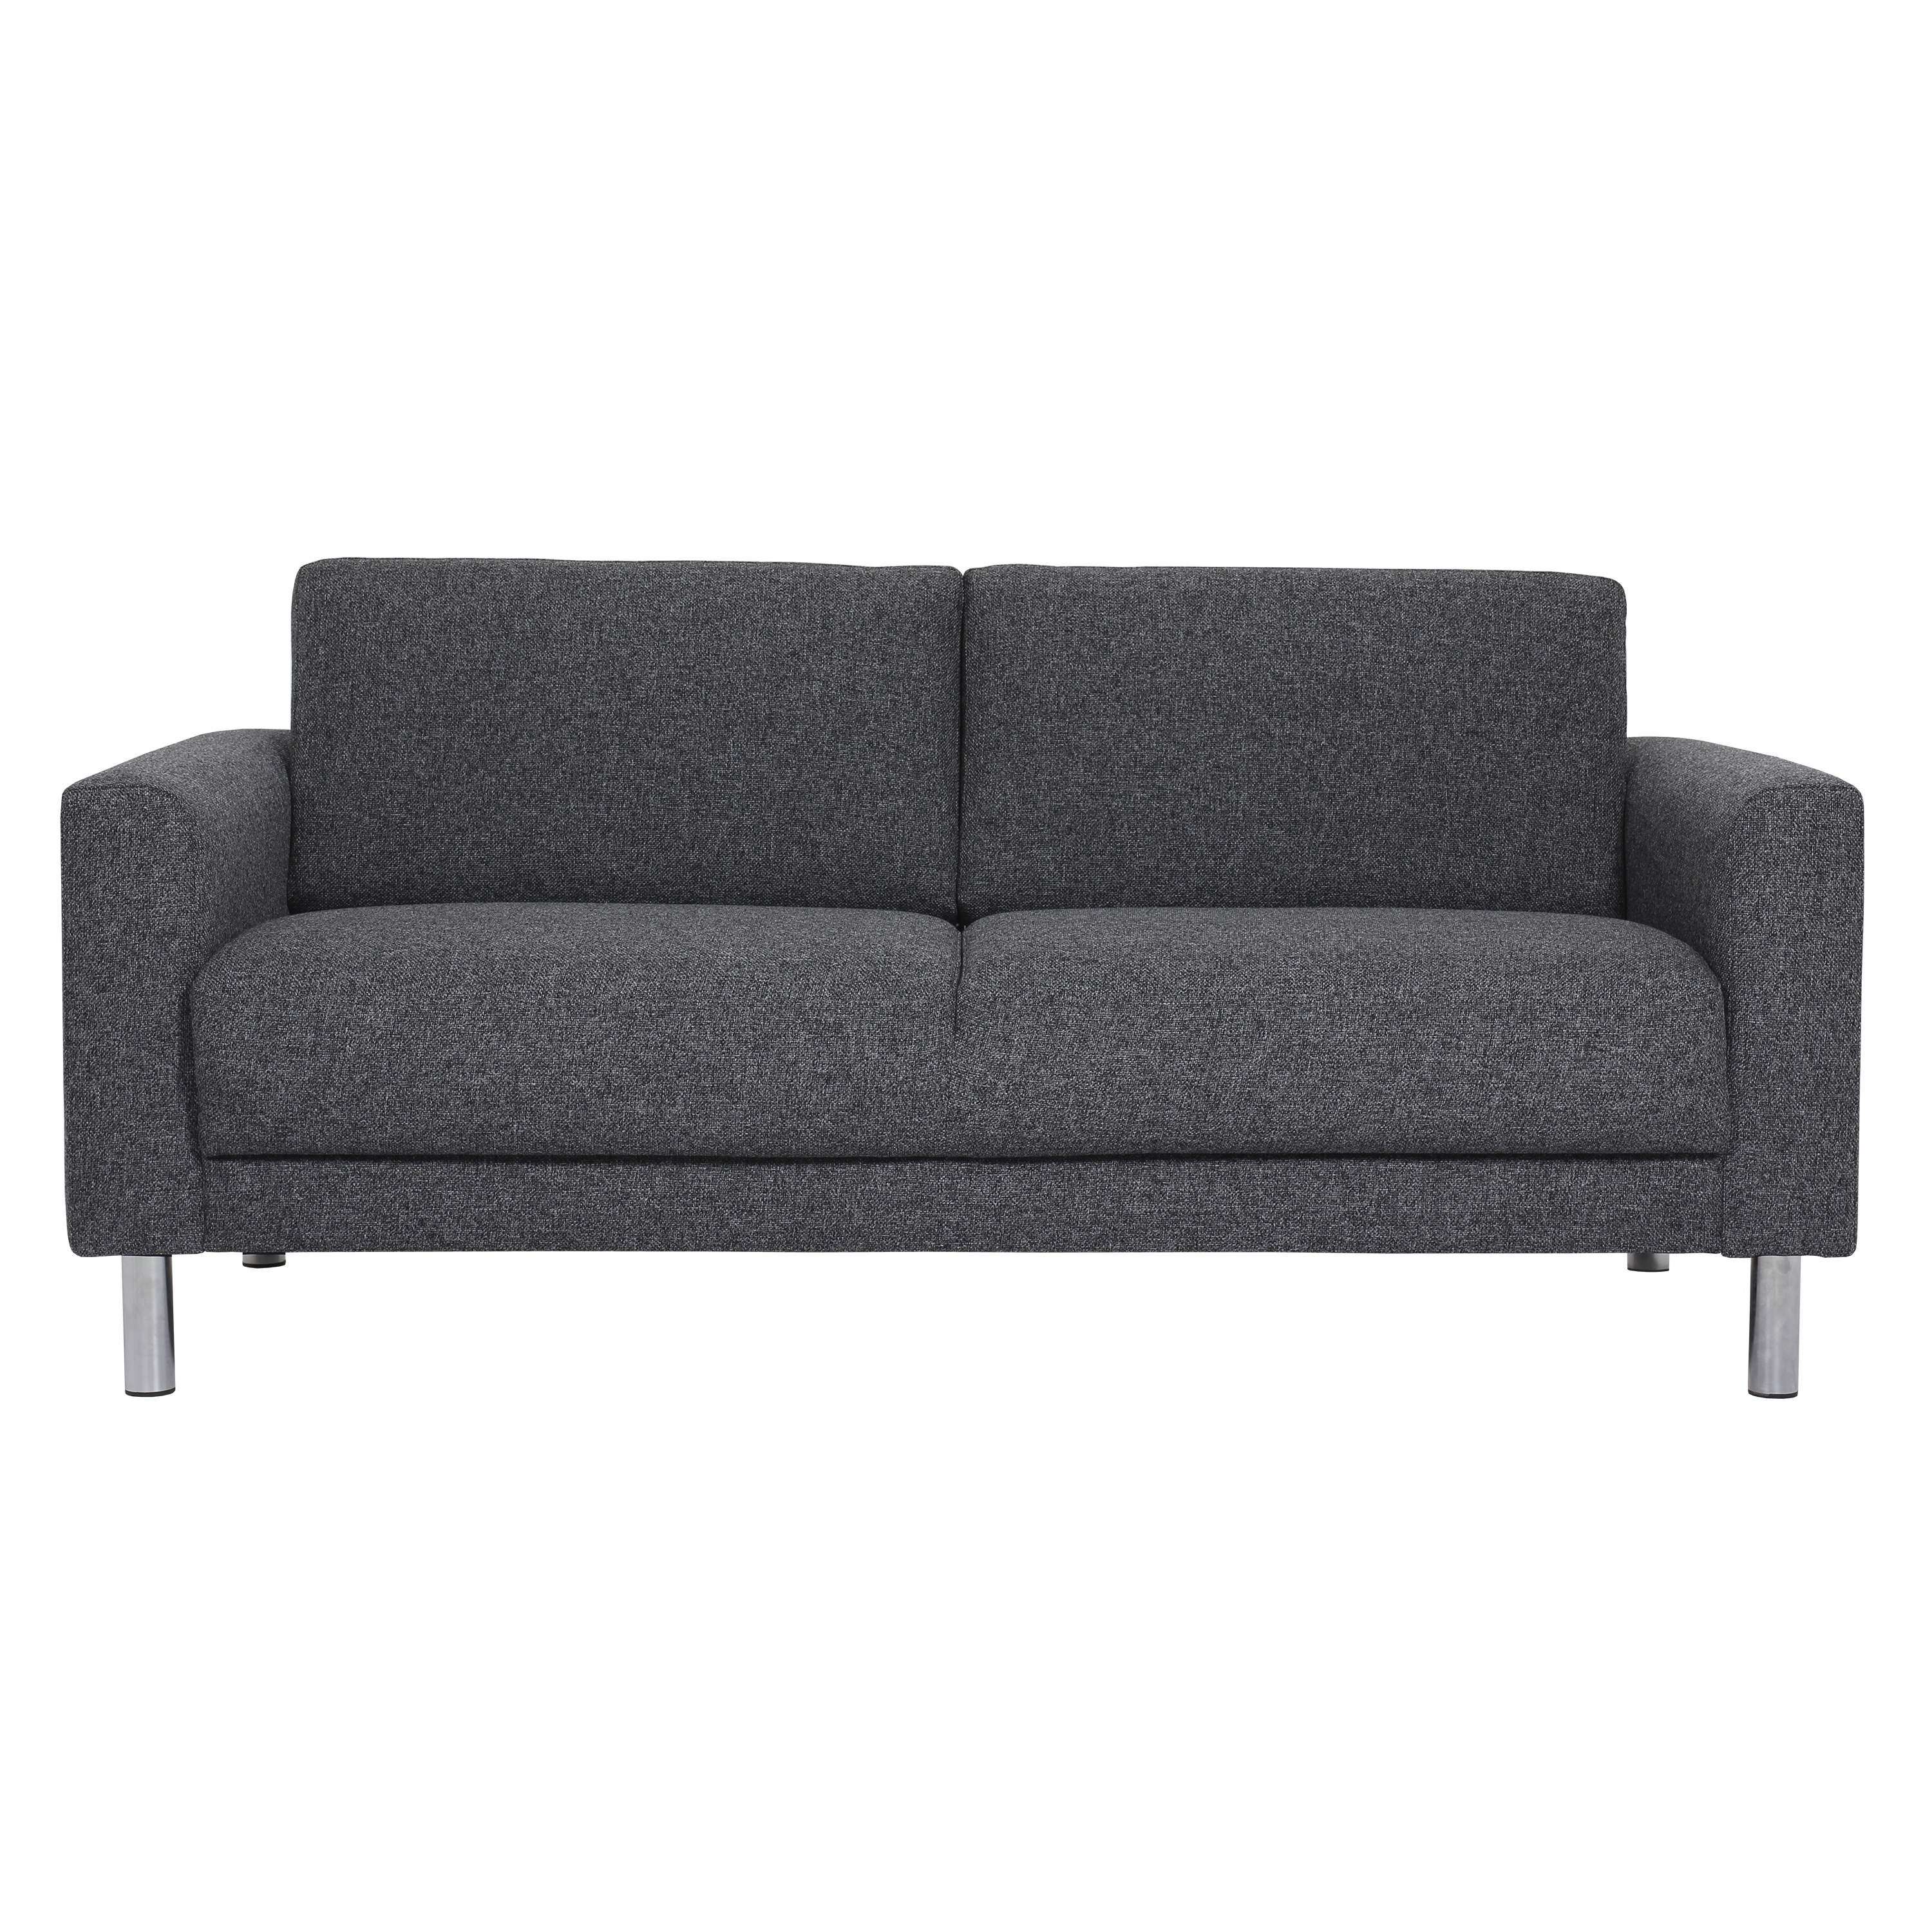

In [97]:
Sofa = list(data_dir.glob('Sofa/*'))
print(Sofa[0])
PIL.Image.open(str(Sofa[0]))

In [98]:
class_names = ['Bed', 'Chair', 'Sofa']

In [99]:
str(Sofa[10])

'F:\\Data Science Canada\\fulhaus\\Dataset\\Data for test\\Data\\sofa\\Alena Wool Blend Loveseat.jpg'

In [100]:
import cv2
image=cv2.imread(str(Sofa[10]))
image_resized= cv2.resize(image, (75,75))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

[[0. 0. 1.]]
The predicted class is Sofa


In [101]:
def model_predict(img_path, model):
#     img = image.load_img(img_path, target_size=(200, 200))

#     # Preprocessing the image
#     x = image.img_to_array(img)
#     # x = np.true_divide(x, 255)
#     x = np.expand_dims(x, axis=0)

#     # Be careful how your trained model deals with the input
#     # otherwise, it won't make correct prediction!
#     x = preprocess_input(x, mode='caffe')

#     preds = model.predict(x)
#     # preds = np.argmax(preds)
    #print(img_path)
    image=cv2.imread(img_path)
    image_resized= cv2.resize(image, (75,75))
    image=np.expand_dims(image_resized,axis=0)
    pred=model.predict(image)
    #print(pred)
    output_class=class_names[np.argmax(pred)]
    #print("The predicted class is", output_class)

    return output_class

In [102]:
iimg_path=("F:\\Data Science Canada\\fulhaus\\Dataset\\Data for test\\Data\\sofa\\Alena Wool Blend Loveseat.jpg")
model_predict(iimg_path,model)

'Sofa'

In [103]:
!pip install gevent

In [110]:
print(tf.__version__)

1.14.0


In [105]:
from flask import Flask, render_template

def predict_label(img_path, model):
    image=cv2.imread(img_path)
    image_resized= cv2.resize(image, (75,75))
    image=np.expand_dims(image_resized,axis=0)
    pred=model.predict(image)
    output_class=class_names[np.argmax(pred)]
    return output_class

app = Flask(__name__)

@app.route('/',methods=['GET', 'POST'])
def index():
    return render_template('index.html')

@app.route("/submit", methods = ['GET', 'POST'])
def get_hours():
    if request.method == 'POST':
        img = request.files['my_image']
        img_path = "F:\\Data Science Canada\\fulhaus\\Dataset\\Data for test\\static\\" + img.filename
        img.save(img_path)
        p = predict_label(iimg_path,model)
        
    return render_template("index.html", prediction = p, img_path = img_path)

if __name__ == '__main__':
      app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
I0223 14:52:22.972502  4940 _internal.py:225]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [68]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/',methods=['GET', 'POST'])
def index():
    return render_template('index.html')

@app.route("/submit", methods = ['GET', 'POST'])
def get_hours():
    if request.method == 'POST':
        img = request.files['my_image']
        #print(img)
        img_path = "static/" + img.filename
        img.save(img_path)
        #print(img_path)
        p = model_predict(iimg_path,model)
        #print(p)
        #p="Sofa"
    return render_template("index.html", prediction = p, img_path = img_path)

# @app.route('/predict', methods=['GET', 'POST'])
# def upload():
#     if request.method == 'POST':
#         # Get the file from post request
#         f = request.files['file']

#         # Save the file to ./uploads
#         basepath = os.path.dirname(__file__)
#         file_path = os.path.join(
#             basepath, 'uploads', secure_filename(f.filename))
#         f.save(file_path)

#         # Make prediction
#         preds = model_predict(file_path, model)

#         # Process your result for human
#         #pred_class = preds.argmax(axis=-1)    # Simple argmax
                   
#         # pred_class = decode_predictions(preds, top=1)   # ImageNet Decode
#         # result = str(pred_class[0][0][1])               # Convert to string
        
#         # pred_class = int(pred_class)
#         #classes ={0: "ALL", 1: "AML", 2: "CLL", 3: "CML"}

#         # return str("The image is classified as: "+str(classes[pred_class]))
#         return str(preds)

#     return None

if __name__ == '__main__':
      app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
I0223 12:34:08.819436  4940 _internal.py:225]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Feb/2023 12:34:12] "GET / HTTP/1.1" 200 -
I0223 12:34:12.539435 15712 _internal.py:225] 127.0.0.1 - - [23/Feb/2023 12:34:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Feb/2023 12:34:17] "POST /submit HTTP/1.1" 500 -
I0223 12:34:17.212719  6116 _internal.py:225] 127.0.0.1 - - [23/Feb/2023 12:34:17] "POST /submit HTTP/1.1" 500 -
Traceback (most recent call last):
  File "c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\flask\app.py", line 2091, in __call__
    return self.wsgi_app(environ, start_response)
  File "c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\flask\app.py", line 2076, in wsgi_app
    response = self.handle_exception(e)
  File "c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    respo

In [50]:
@app.route("/", )
def index():
	return render_template("index.html")


@app.route("/submit", methods = ['GET', 'POST'])
def get_hours():
	if request.method == 'POST':
		img = request.files['my_image']
		img_path = "static/" + img.filename	
		img.save(img_path)
		p = model_predict(img_path, model)

	return render_template("index.html", prediction = p, img_path = img_path)





if __name__ =='__main__':
	#app.debug = True
	app.run(debug = True)

AssertionError: View function mapping is overwriting an existing endpoint function: index